In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [3]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [5]:
cm = sns.light_palette("green", as_cmap=True)
data.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
print(data.columns)
print(data.shape)
std = StandardScaler()
data.drop([
    'Date'
],axis = 1, inplace = True)
data = std.fit_transform(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1009, 7)


In [7]:
new_data = pd.DataFrame(data)
new_data.head()

,0,1,2,3,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045


In [8]:
Y = new_data[3]
X = new_data.drop([3], axis=1)

In [9]:
X.head()

,0,1,2,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,1.709045


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [11]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred = np.nan_to_num(model.predict(X_test))
    print(mse(y_test, y_pred))
    print(mae(y_test, y_pred))
    ms.append(mse(y_test, y_pred))
    ma.append(mae(y_test, y_pred))

In [12]:
model = RandomForestRegressor(n_estimators = 5)
model_training_and_score(model)

0.0004597010609139954
0.008804549564186704


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def model_training_and_score(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and test sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate MSE for both training and test sets
    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)

    print(f"Training MSE: {mse_train:.4f}")
    print(f"Test MSE: {mse_test:.4f}")

    return test_predictions

In [14]:

model = RandomForestRegressor(n_estimators=5, random_state=42)
test_predictions = model_training_and_score(model, X_train, y_train, X_test, y_test)


Training MSE: 0.0000
Test MSE: 0.0003


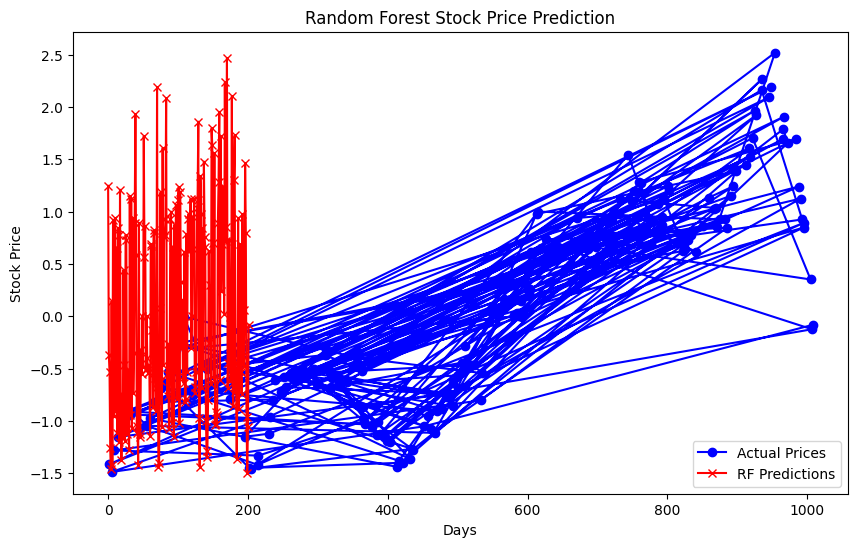

In [15]:
import matplotlib.pyplot as plt

# Assuming y_test is the actual data and is already scaled to the original scale if needed
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', marker='o')
plt.plot(test_predictions, label='RF Predictions', color='red', marker='x')
plt.title('Random Forest Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()